In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
directorio = os.path.dirname(os.getcwd())

In [3]:
baches = gpd.read_file(directorio + '/data/processed/tidy_baches_agebs_hmo.shp')
baches.CVEGEO = baches.CVEGEO.str[-4:]
se_ageb = gpd.read_file(directorio + '/data/processed/tidy_socioeconimico_ageb_hermosillo.shp')
se = pd.read_csv(directorio + '/data/processed/tidy_socioeconomico_hermosillo.csv')

In [4]:
baches = baches.dropna()

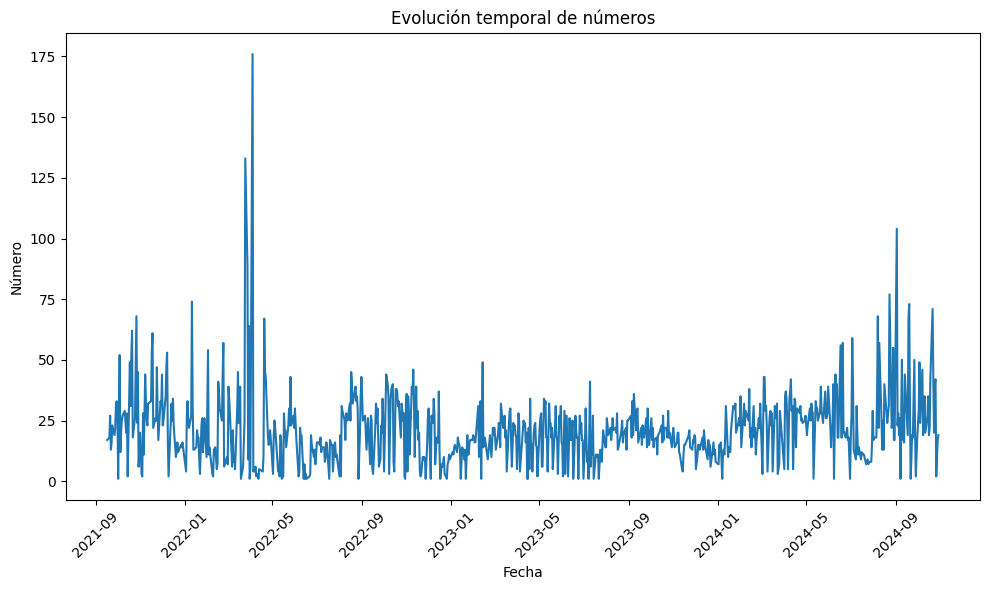

In [5]:
baches_por_fecha = baches.groupby('date',as_index=False).size()

plt.figure(figsize=(10, 6))
plt.plot(baches_por_fecha['date'], baches_por_fecha['size'])

# Configuración de etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Número")
plt.title("Evolución temporal de números")

# Rotar las etiquetas de las fechas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

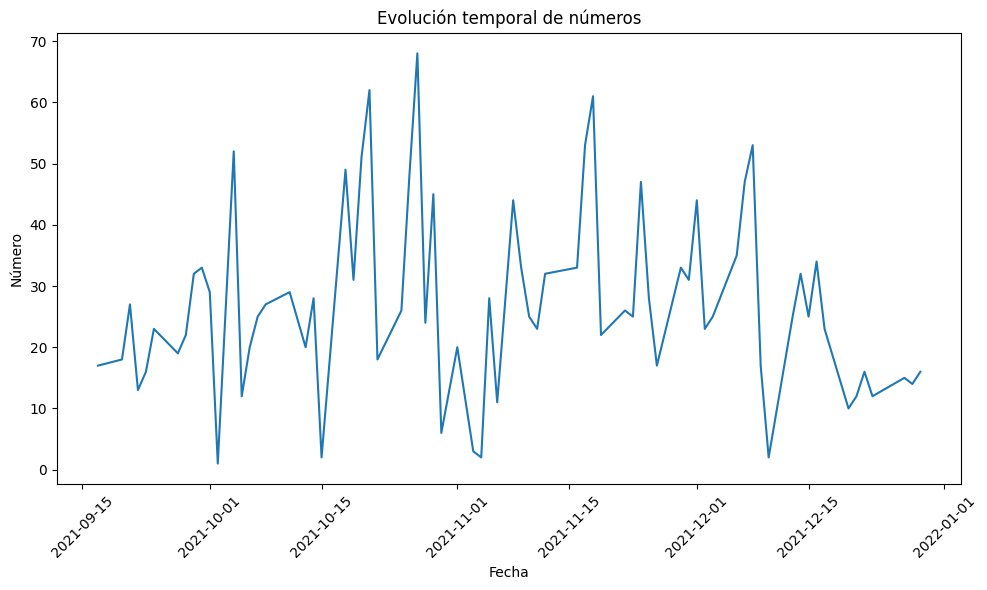

In [6]:
baches_por_fecha_2021 = baches_por_fecha[baches_por_fecha['date'].dt.year == 2021]

plt.figure(figsize=(10, 6))
plt.plot(baches_por_fecha_2021['date'], baches_por_fecha_2021['size'])

# Configuración de etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Número")
plt.title("Evolución temporal de números")

# Rotar las etiquetas de las fechas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

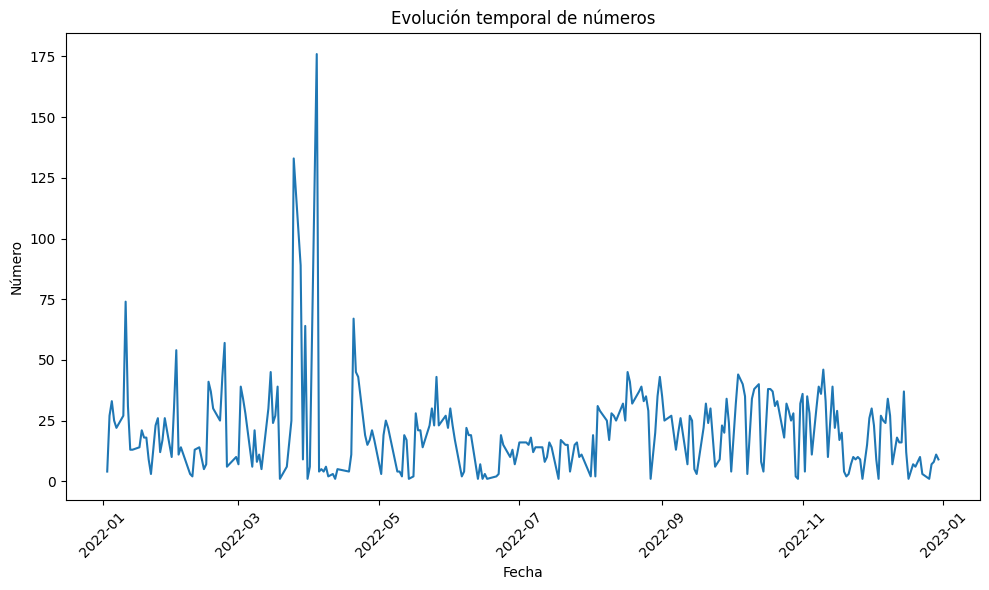

In [7]:
baches_por_fecha_2021 = baches_por_fecha[baches_por_fecha['date'].dt.year == 2022]

plt.figure(figsize=(10, 6))
plt.plot(baches_por_fecha_2021['date'], baches_por_fecha_2021['size'])

# Configuración de etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Número")
plt.title("Evolución temporal de números")

# Rotar las etiquetas de las fechas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

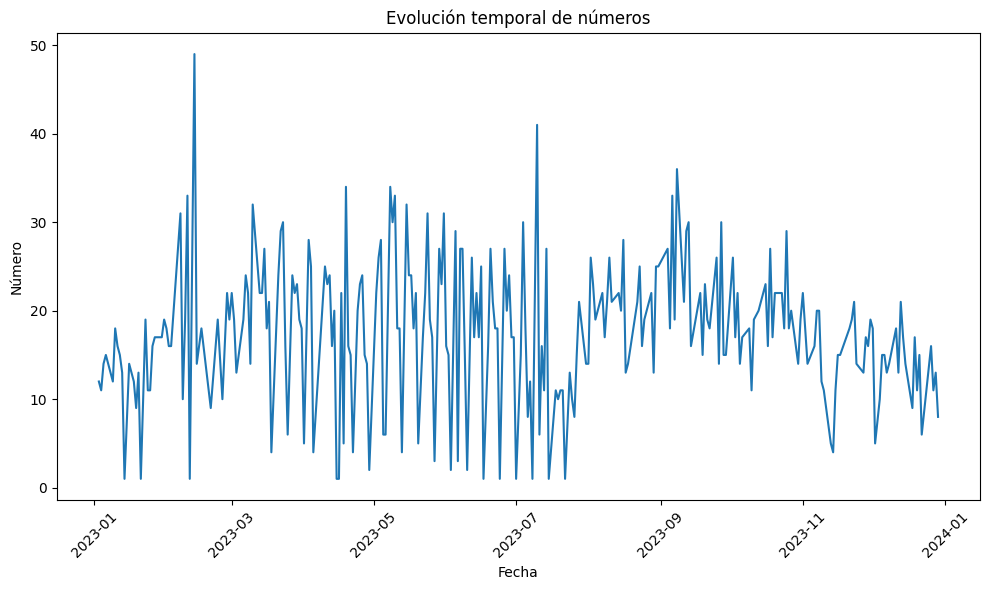

In [8]:
baches_por_fecha_2021 = baches_por_fecha[baches_por_fecha['date'].dt.year == 2023]

plt.figure(figsize=(10, 6))
plt.plot(baches_por_fecha_2021['date'], baches_por_fecha_2021['size'])

# Configuración de etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Número")
plt.title("Evolución temporal de números")

# Rotar las etiquetas de las fechas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

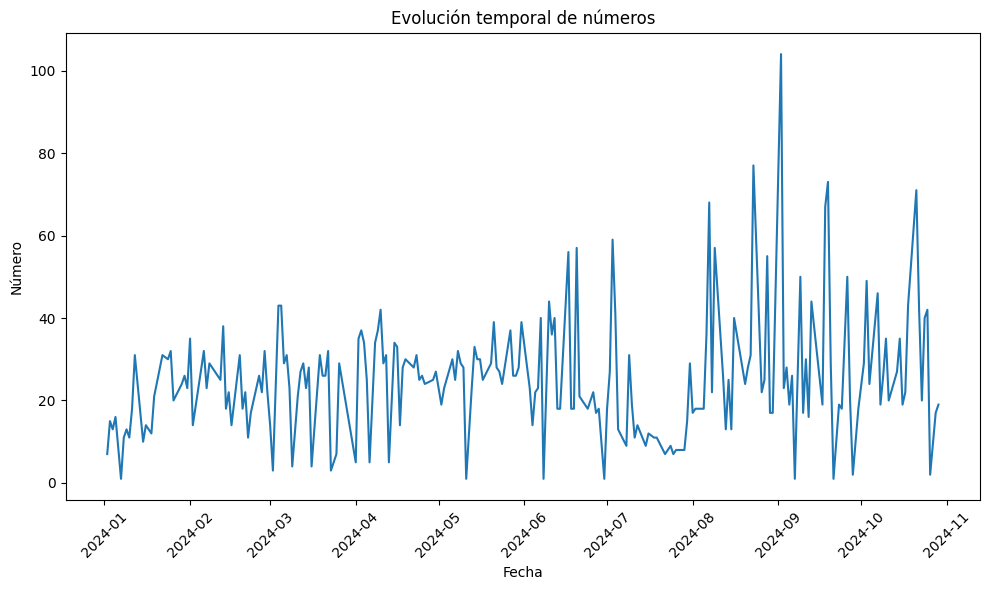

In [9]:
baches_por_fecha_2021 = baches_por_fecha[baches_por_fecha['date'].dt.year == 2024]

plt.figure(figsize=(10, 6))
plt.plot(baches_por_fecha_2021['date'], baches_por_fecha_2021['size'])

# Configuración de etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Número")
plt.title("Evolución temporal de números")

# Rotar las etiquetas de las fechas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [10]:
fechas_importantes = baches_por_fecha.sort_values(by='size' \
                                                ,ascending=False)['date'].head(1).to_list()

In [11]:
baches = baches.to_crs('EPSG:4326')

/tmp/ipykernel_115721/490376176.py:6: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


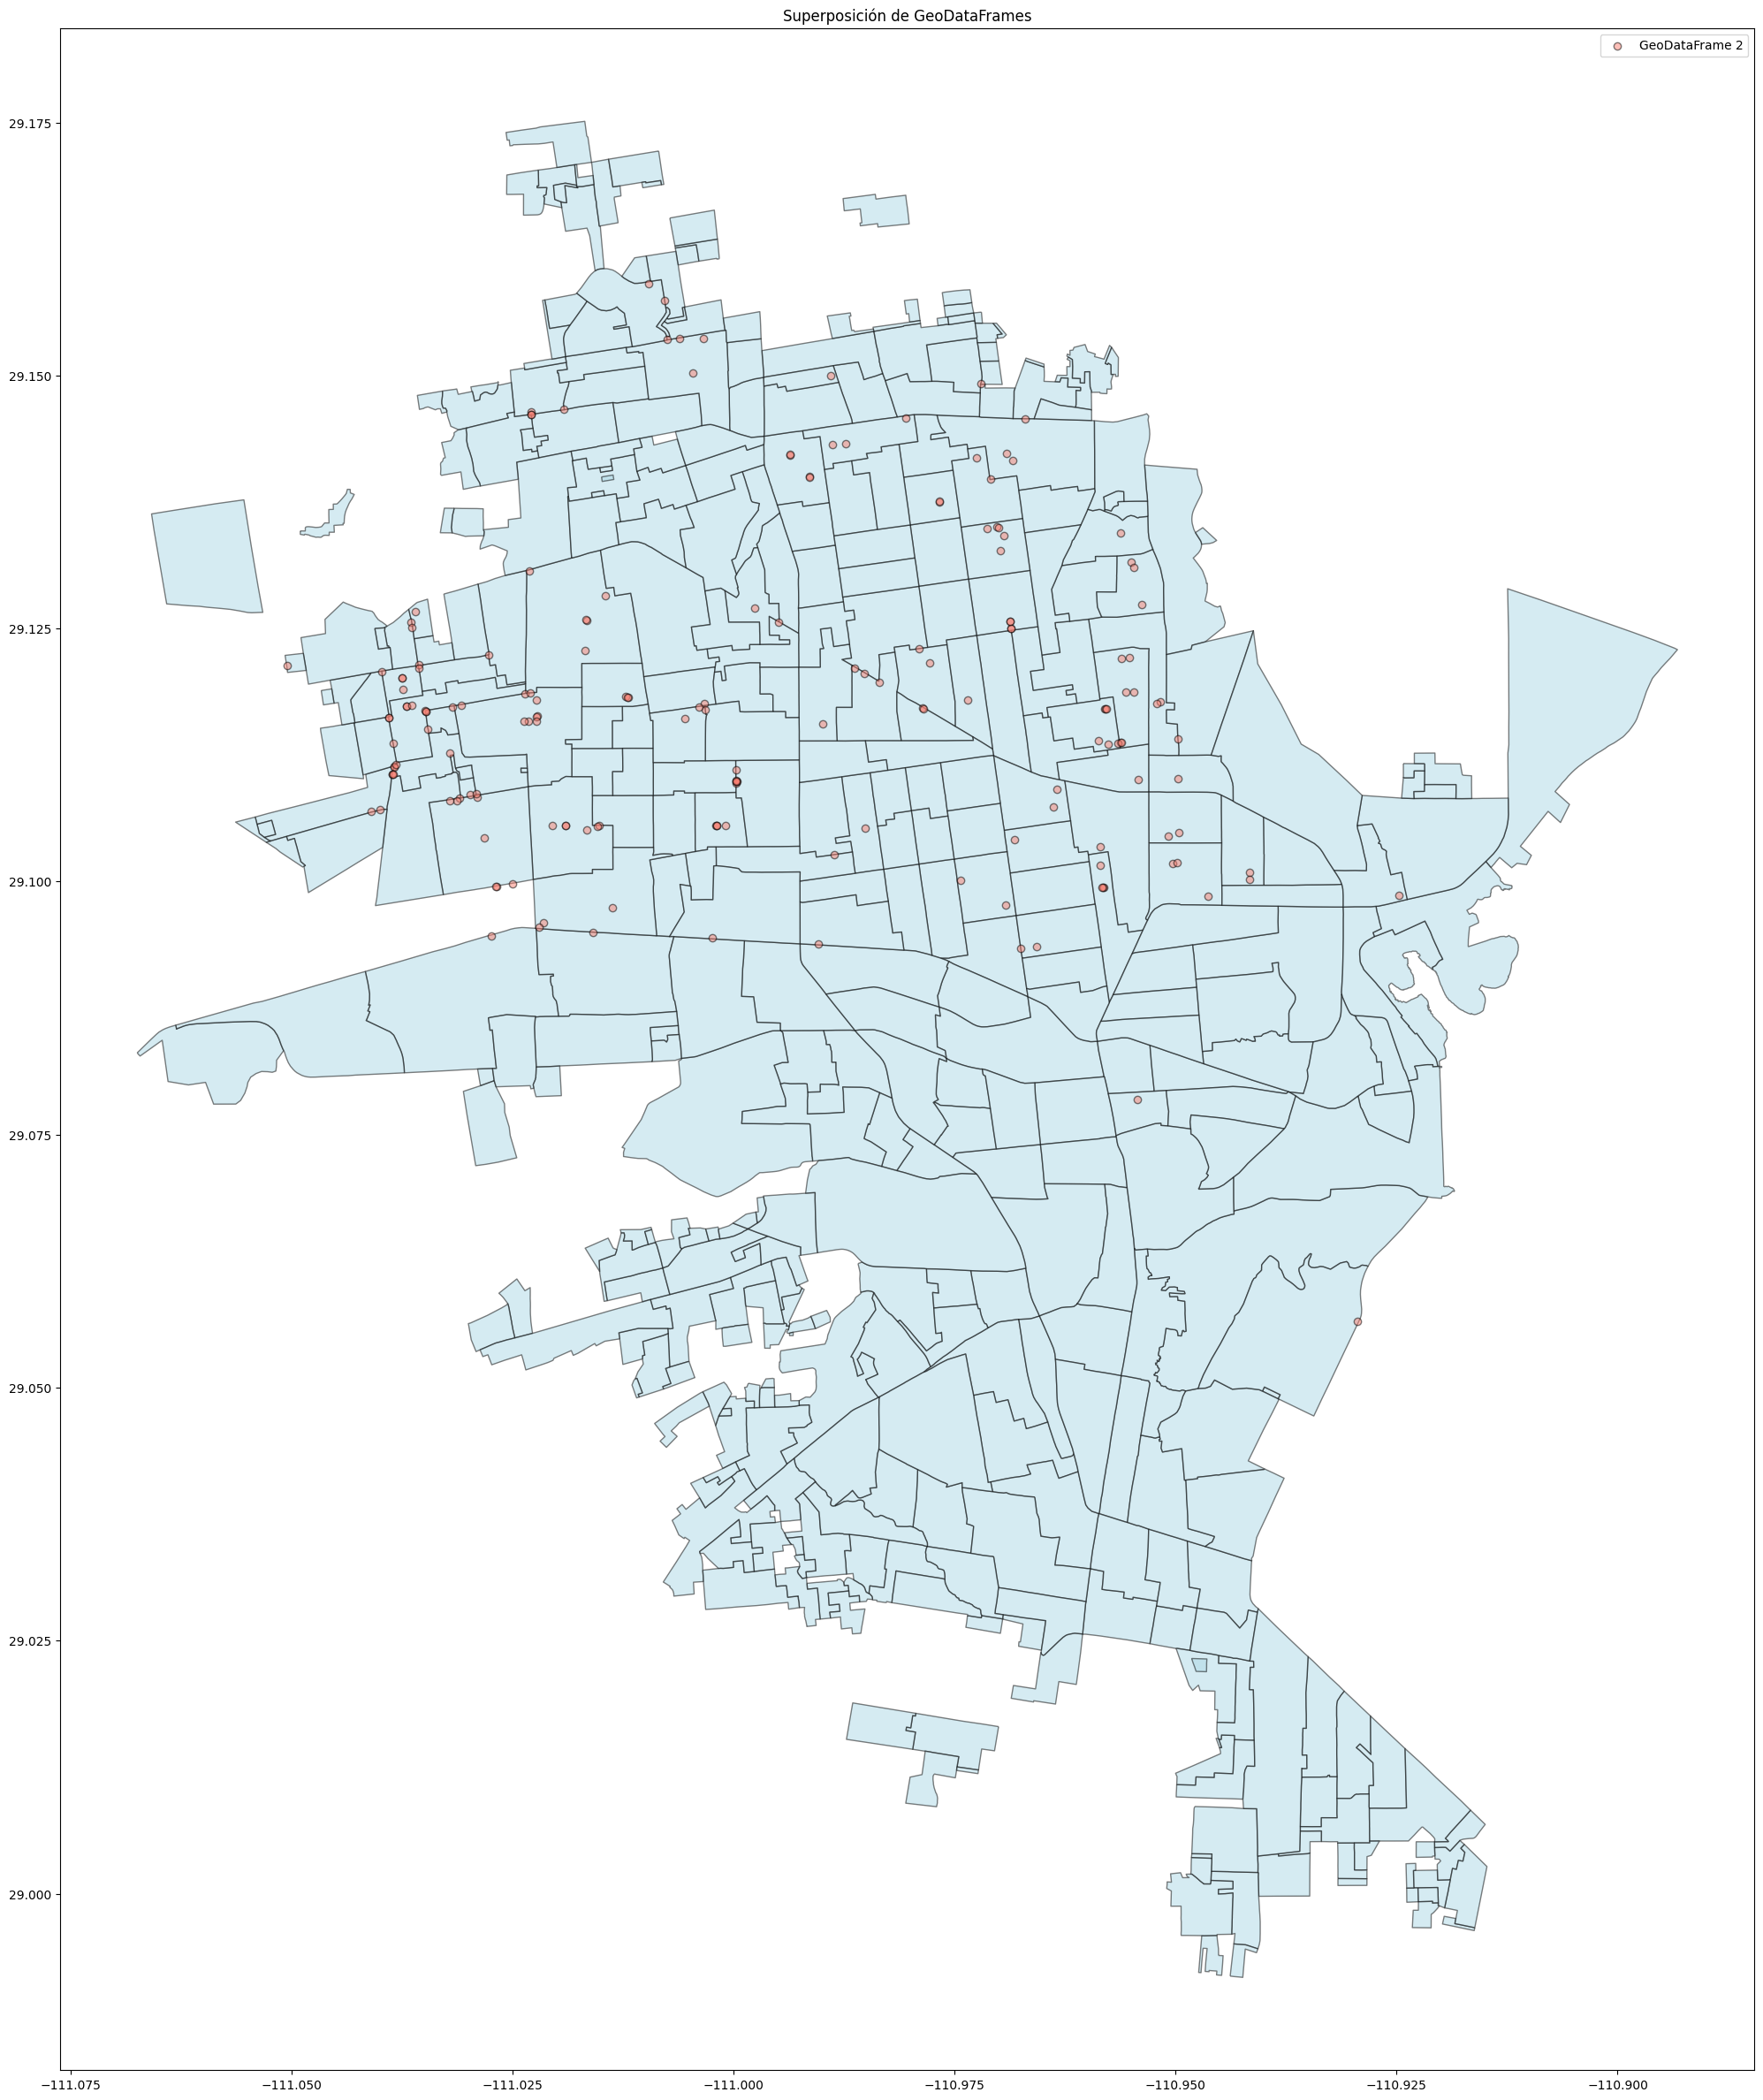

In [12]:
fig, ax = plt.subplots(figsize=(30,30))
se_ageb.plot(ax=ax, color="lightblue", edgecolor="black", alpha=0.5, label="GeoDataFrame 1")
baches[baches.date.isin(fechas_importantes)].plot(ax=ax, color="salmon", edgecolor="black", alpha=0.5, label="GeoDataFrame 2")

# Agregar leyenda y título
plt.legend()
plt.title("Superposición de GeoDataFrames")
plt.show()

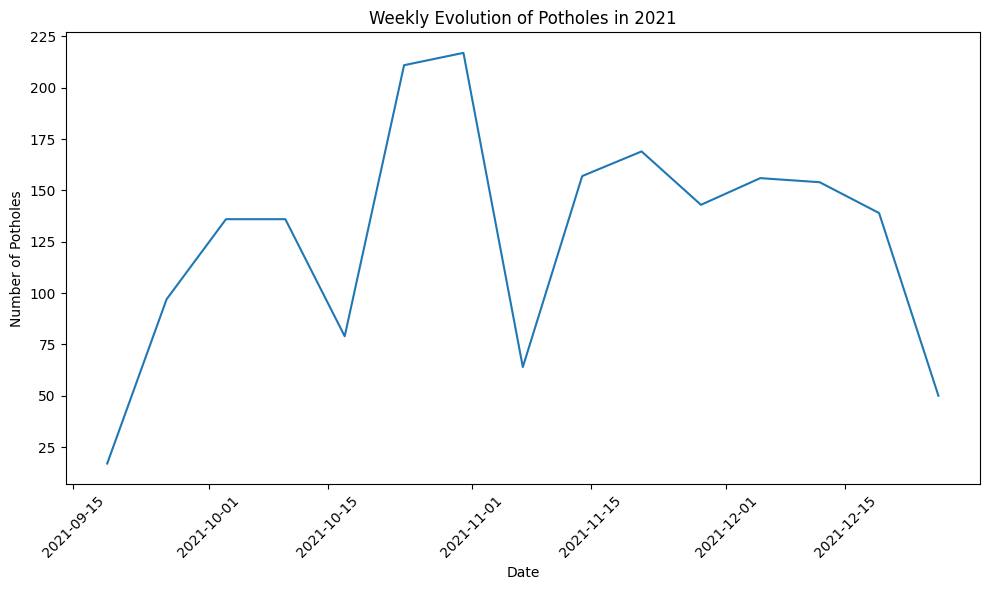

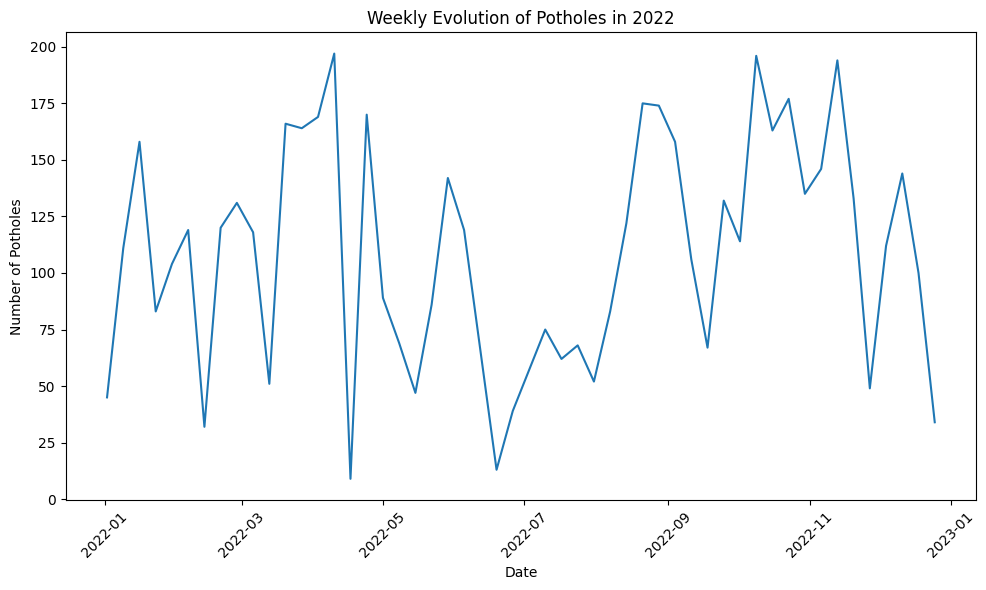

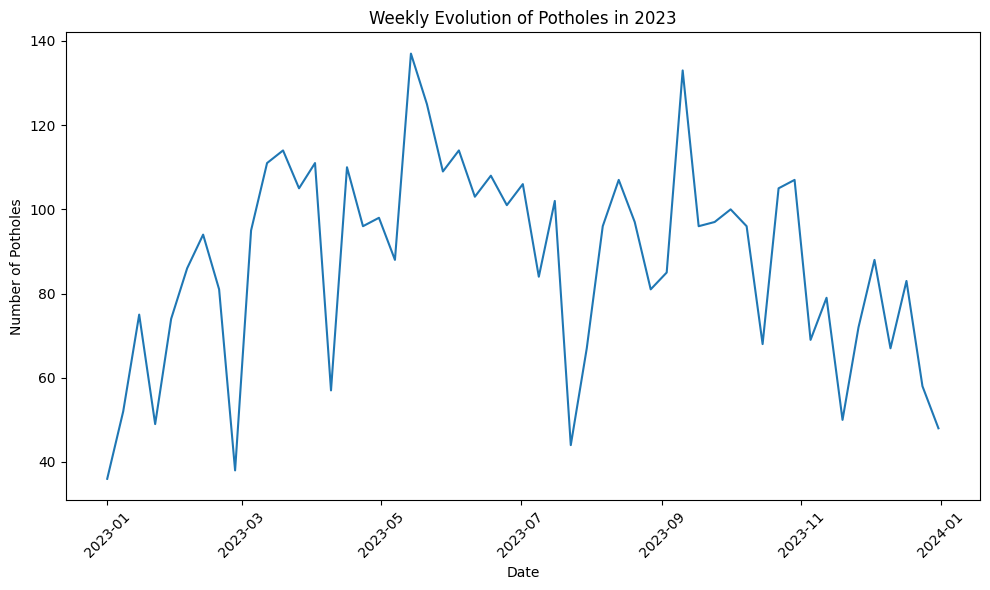

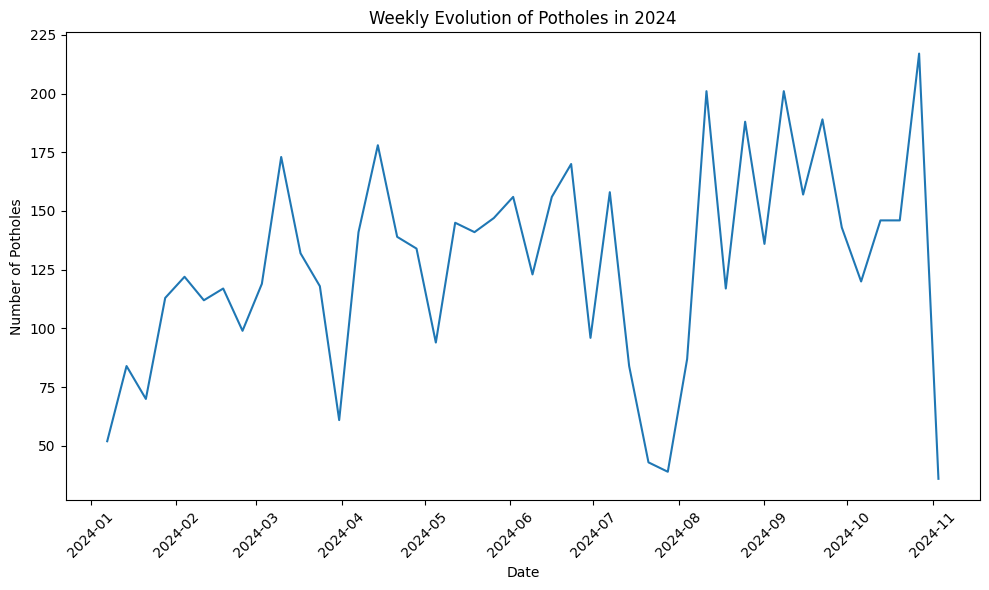

In [16]:
baches_por_fecha['date'] = pd.to_datetime(baches_por_fecha['date'])

for i in [2021, 2022, 2023, 2024]:
    # Group data by week and count the number of potholes
    baches_por_fecha_semana = baches_por_fecha.set_index('date').resample('W').sum().reset_index()

    # Filter the data for the specific year
    baches_por_fecha_semana_year = baches_por_fecha_semana[baches_por_fecha_semana['date'].dt.year == i]

    # Create the line plot with Seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=baches_por_fecha_semana_year, x='date', y='size')

    # Set labels and title
    plt.xlabel("Date")
    plt.ylabel("Number of Potholes")
    plt.title(f"Weekly Evolution of Potholes in {i}")

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

<Figure size 2000x2000 with 0 Axes>

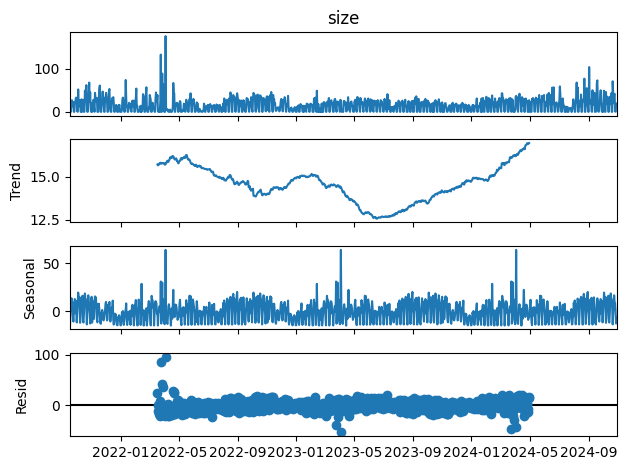

In [82]:
baches_por_fecha = baches_por_fecha.reset_index()
baches_por_fecha.set_index('date', inplace=True)

# Opcional: Asegurarse de tener los datos agregados por día (si los datos son más granulares)
df = baches_por_fecha.resample('D').sum()  # Cambia 'D' a 'M' si quieres ver datos mensuales

# Descomposición estacional con un período de 365 días para capturar patrones anuales
result = seasonal_decompose(df['size'], model='additive', period=365)
plt.figure(figsize=(20,20))
# Graficar los resultados
result.plot()
plt.show()

<Axes: xlabel='date'>

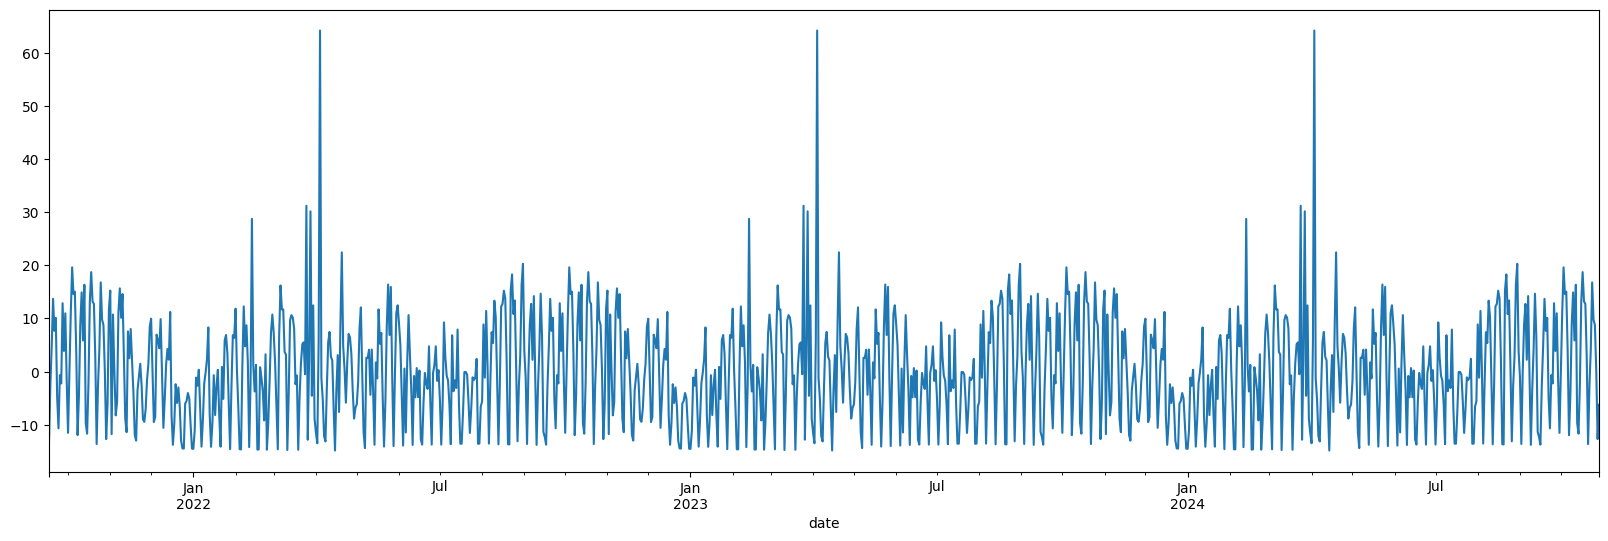

In [73]:
result.seasonal.plot(figsize=(20,6))

<Axes: xlabel='date'>

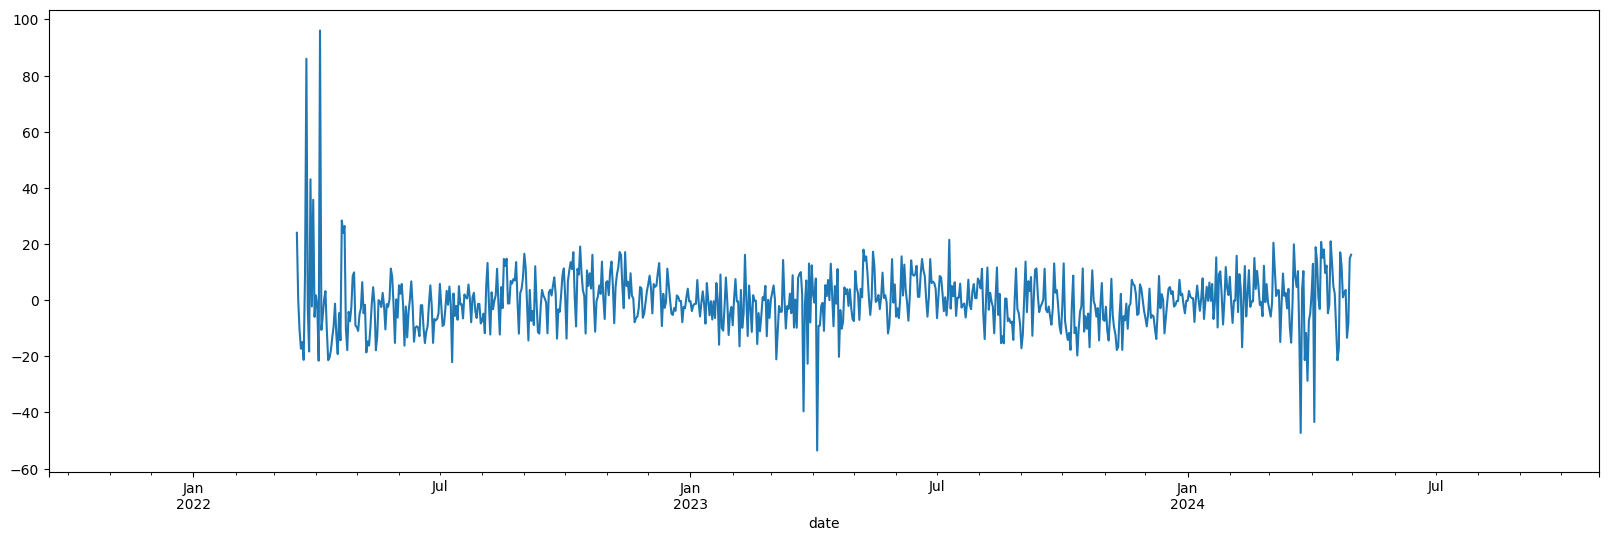

In [74]:
result.resid.plot(figsize=(20,6))

In [31]:
baches['dia_semana'] = baches['date'].dt.day_name()

# Agrupa por día de la semana
df_grouped = baches.groupby('dia_semana', as_index=False).size().reset_index()

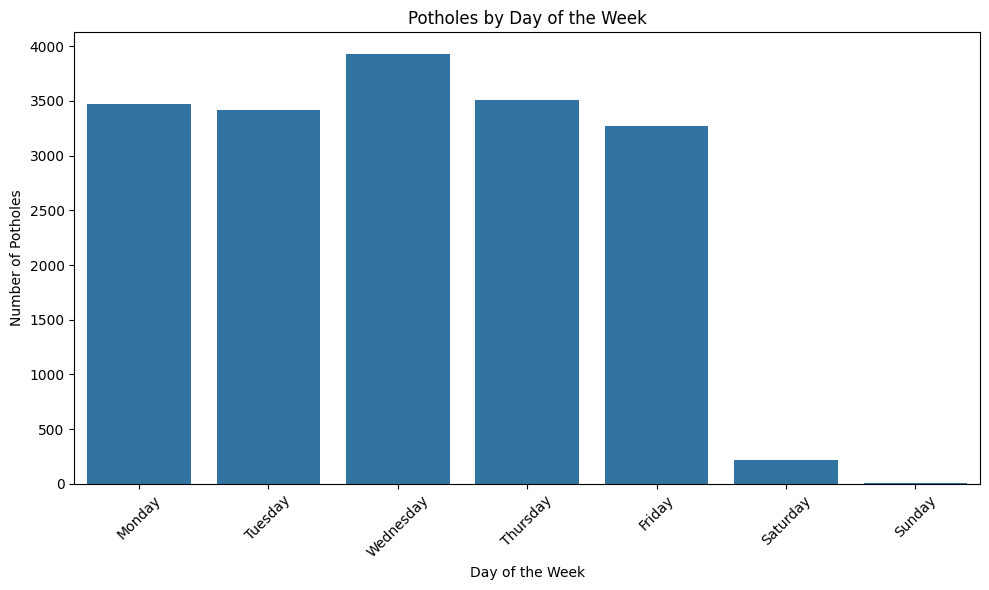

In [36]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_grouped['dia_semana'] = pd.Categorical(df_grouped['dia_semana'], categories=days_order, ordered=True)

# Sort by the day order
df_grouped = df_grouped.sort_values('dia_semana')

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='dia_semana', y='size')

# Set labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Number of Potholes")
plt.title("Potholes by Day of the Week")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
baches.head()

,latitude,longitude,CVEGEO,date,neighborho,descriptio,geometry,dia_semana
0,29.094161,-110.969471,1996,2021-10-18,[551],"Hay un bache en la calle, y los carros se golp...",POINT (-110.96947 29.09416),Monday
1,29.124060,-110.971318,1746,2021-10-19,[601],"Buen dia! Para reportar pavimento dañado, bach...",POINT (-110.97132 29.12406),Tuesday
2,29.123985,-110.971286,1746,2021-10-19,[601],"Buen dia! Para reportar pavimento dañado, bach...",POINT (-110.97129 29.12399),Tuesday
3,29.128777,-110.953926,5043,2021-10-21,[49],toda la calle desde el blvd Morelos tiene vari...,POINT (-110.95393 29.12878),Thursday
4,29.083809,-111.042101,2617,2021-10-04,[74],C. SOLICITA BACHEO ASEGURA REPORTANTE QUE ES P...,POINT (-111.0421 29.08381),Monday


In [102]:
baches['month_year'] = baches['date'].dt.to_period('M')
baches.groupby('month_year').size()

month_year
2021-09    220
2021-10    673
2021-11    597
2021-12    480
2022-01    466
2022-02    402
2022-03    652
2022-04    471
2022-05    393
2022-06    229
2022-07    273
2022-08    652
2022-09    475
2022-10    707
2022-11    539
2022-12    377
2023-01    286
2023-02    304
2023-03    490
2023-04    366
2023-05    540
2023-06    450
2023-07    312
2023-08    452
2023-09    426
2023-10    409
2023-11    302
2023-12    279
2024-01    392
2024-02    479
2024-03    501
2024-04    644
2024-05    631
2024-06    545
2024-07    376
2024-08    677
2024-09    708
2024-10    647
Freq: M, dtype: int64

In [106]:
baches_grouped = baches.groupby('month_year').size()


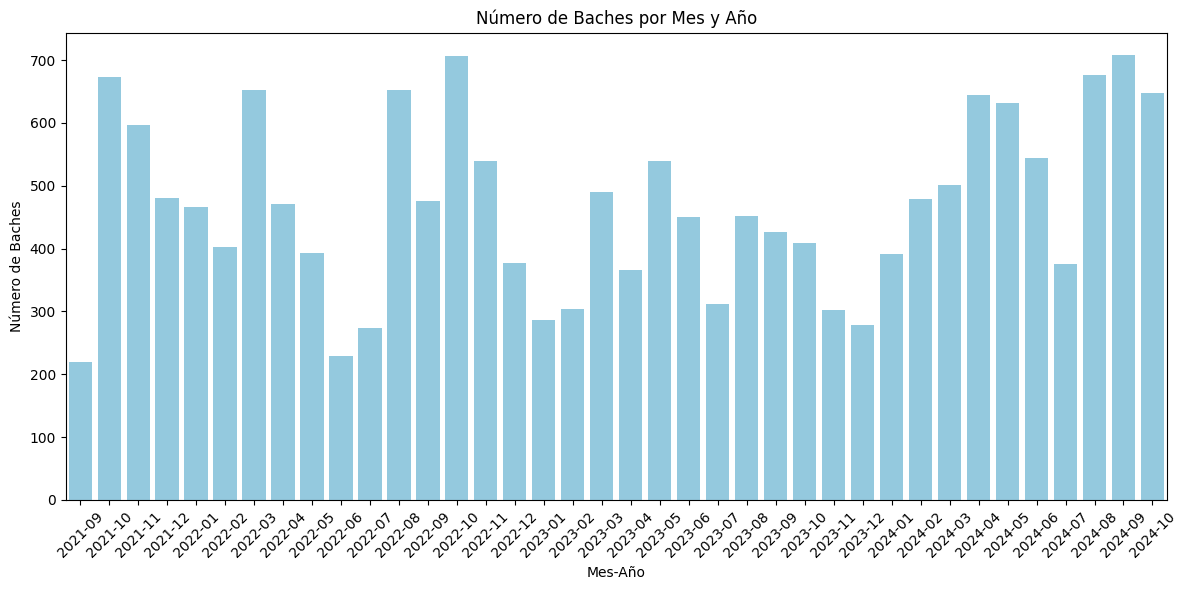

In [107]:
baches_grouped = baches_grouped.reset_index(name='size')

# Graficar con seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='month_year', y='size', data=baches_grouped, color='skyblue')

# Etiquetas y título
plt.xlabel('Mes-Año')
plt.ylabel('Número de Baches')
plt.title('Número de Baches por Mes y Año')

# Rotar las etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()